In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

SVI DATA & CASE CORRELATION

In [2]:
reduced_time_series = pd.read_csv("data_sources/time_series_cases_state_reduced.csv")
svi_data = pd.read_csv("data_sources/SVI2018_US_COUNTY.csv")

In [3]:
reduced_time_series 

,UID,code3,FIPS,Admin2,Province_State,3/31/21
0,84001001,840,1001.0,Autauga,Alabama,6589
1,84001003,840,1003.0,Baldwin,Alabama,20505
2,84001005,840,1005.0,Barbour,Alabama,2227
3,84001007,840,1007.0,Bibb,Alabama,2542
4,84001009,840,1009.0,Blount,Alabama,6444
...,...,...,...,...,...,...
3173,84056037,840,56037.0,Sweetwater,Wyoming,4022
3174,84056039,840,56039.0,Teton,Wyoming,3609
3175,84056041,840,56041.0,Uinta,Wyoming,2128
3176,84056043,840,56043.0,Washakie,Wyoming,891


In [4]:
svi_data 

,State,ST_ABBR,County,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,...,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
0,ALABAMA,AL,Autauga,1001,"Autauga County, Alabama",594.443459,55200,23315,21115,8422,...,0,0,0,0,0,0,3875,7.1,0.9,37301
1,ALABAMA,AL,Blount,1009,"Blount County, Alabama",644.830460,57645,24222,20600,8220,...,0,0,0,0,0,0,6303,11.0,1.3,40036
2,ALABAMA,AL,Butler,1013,"Butler County, Alabama",776.838201,20025,10026,6708,4640,...,0,0,0,0,0,0,2005,10.2,1.7,17280
3,ALABAMA,AL,Calhoun,1015,"Calhoun County, Alabama",605.867251,115098,53682,45033,20819,...,0,0,0,0,0,0,10686,9.4,0.7,117894
4,ALABAMA,AL,Chambers,1017,"Chambers County, Alabama",596.560643,33826,16981,13516,5531,...,0,0,0,0,0,0,3613,10.8,1.4,27176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,TEXAS,TX,Duval,48131,"Duval County, Texas",1793.476183,11355,5592,3511,2751,...,0,1,1,0,2,10,2656,24.5,3.7,9592
3137,TEXAS,TX,Zapata,48505,"Zapata County, Texas",998.411980,14369,6388,4405,5609,...,1,1,0,0,2,10,4206,29.3,3.4,10924
3138,TEXAS,TX,Zavala,48507,"Zavala County, Texas",1297.406535,12131,4344,3509,4150,...,0,1,1,0,2,10,2194,18.4,3.0,10672
3139,TEXAS,TX,Dimmit,48127,"Dimmit County, Texas",1328.884075,10663,4408,3309,3148,...,0,1,1,0,2,11,2345,22.2,5.1,8229


In [5]:
df1= pd.merge(svi_data, reduced_time_series, on="FIPS", how="outer")
df1

,State,ST_ABBR,County,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,...,F_TOTAL,E_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,UID,code3,Admin2,Province_State,3/31/21
0,ALABAMA,AL,Autauga,1001.0,"Autauga County, Alabama",594.443459,55200.0,23315.0,21115.0,8422.0,...,0.0,3875.0,7.1,0.9,37301.0,84001001.0,840.0,Autauga,Alabama,6589.0
1,ALABAMA,AL,Blount,1009.0,"Blount County, Alabama",644.830460,57645.0,24222.0,20600.0,8220.0,...,0.0,6303.0,11.0,1.3,40036.0,84001009.0,840.0,Blount,Alabama,6444.0
2,ALABAMA,AL,Butler,1013.0,"Butler County, Alabama",776.838201,20025.0,10026.0,6708.0,4640.0,...,0.0,2005.0,10.2,1.7,17280.0,84001013.0,840.0,Butler,Alabama,2097.0
3,ALABAMA,AL,Calhoun,1015.0,"Calhoun County, Alabama",605.867251,115098.0,53682.0,45033.0,20819.0,...,0.0,10686.0,9.4,0.7,117894.0,84001015.0,840.0,Calhoun,Alabama,14224.0
4,ALABAMA,AL,Chambers,1017.0,"Chambers County, Alabama",596.560643,33826.0,16981.0,13516.0,5531.0,...,0.0,3613.0,10.8,1.4,27176.0,84001017.0,840.0,Chambers,Alabama,3488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,NaN,NaN,NaN,90040.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,84090040.0,840.0,Unassigned,Oklahoma,1887.0
3179,NaN,NaN,NaN,90044.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,84090044.0,840.0,Unassigned,Rhode Island,12400.0
3180,NaN,NaN,NaN,80047.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,84080047.0,840.0,Out of TN,Tennessee,17855.0
3181,NaN,NaN,NaN,90047.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,84090047.0,840.0,Unassigned,Tennessee,16230.0


In [6]:
df1=df1.dropna()

In [7]:
#set index to FIPS
df1 = df1.set_index(df1['FIPS'])
df1= df1.drop('FIPS', axis=1)

In [8]:
df1 = df1.rename(columns={"3/31/21":"first_year_cases"})

In [9]:
#create variable for case% for each counties population
df1['case_pct'] = df1['first_year_cases']/df1['E_TOTPOP']*100
df1['case_pct'].head()

FIPS
1001.0    11.936594
1009.0    11.178767
1013.0    10.471910
1015.0    12.358164
1017.0    10.311595
Name: case_pct, dtype: float64

In [10]:
# bin and cut the case_pct column into 2 classifications
# q = df['case_pct'].quantile(.75)
q = df1['case_pct'].quantile(.85)
bins = [0, q , 40]
labels = ['low','high']
df1['case_class'] = pd.cut(df1['case_pct'], bins, labels = labels)
df1['case_class']

FIPS
1001.0      low
1009.0      low
1013.0      low
1015.0     high
1017.0      low
           ... 
48131.0     low
48505.0    high
48507.0    high
48127.0    high
48247.0     low
Name: case_class, Length: 3136, dtype: category
Categories (2, object): ['low' < 'high']

In [11]:
df1['case_pct'].isna().sum()

0

In [12]:
#drop unneeded columns
df1 = df1.drop('case_pct', axis =1)
df1

,State,ST_ABBR,County,LOCATION,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,...,E_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,UID,code3,Admin2,Province_State,first_year_cases,case_class
FIPS,,,,,,,,,,,,,,,,,,,,,
1001.0,ALABAMA,AL,Autauga,"Autauga County, Alabama",594.443459,55200.0,23315.0,21115.0,8422.0,1065.0,...,3875.0,7.1,0.9,37301.0,84001001.0,840.0,Autauga,Alabama,6589.0,low
1009.0,ALABAMA,AL,Blount,"Blount County, Alabama",644.830460,57645.0,24222.0,20600.0,8220.0,909.0,...,6303.0,11.0,1.3,40036.0,84001009.0,840.0,Blount,Alabama,6444.0,low
1013.0,ALABAMA,AL,Butler,"Butler County, Alabama",776.838201,20025.0,10026.0,6708.0,4640.0,567.0,...,2005.0,10.2,1.7,17280.0,84001013.0,840.0,Butler,Alabama,2097.0,low
1015.0,ALABAMA,AL,Calhoun,"Calhoun County, Alabama",605.867251,115098.0,53682.0,45033.0,20819.0,4628.0,...,10686.0,9.4,0.7,117894.0,84001015.0,840.0,Calhoun,Alabama,14224.0,high
1017.0,ALABAMA,AL,Chambers,"Chambers County, Alabama",596.560643,33826.0,16981.0,13516.0,5531.0,773.0,...,3613.0,10.8,1.4,27176.0,84001017.0,840.0,Chambers,Alabama,3488.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48131.0,TEXAS,TX,Duval,"Duval County, Texas",1793.476183,11355.0,5592.0,3511.0,2751.0,482.0,...,2656.0,24.5,3.7,9592.0,84048131.0,840.0,Duval,Texas,1214.0,low
48505.0,TEXAS,TX,Zapata,"Zapata County, Texas",998.411980,14369.0,6388.0,4405.0,5609.0,621.0,...,4206.0,29.3,3.4,10924.0,84048505.0,840.0,Zapata,Texas,1760.0,high
48507.0,TEXAS,TX,Zavala,"Zavala County, Texas",1297.406535,12131.0,4344.0,3509.0,4150.0,421.0,...,2194.0,18.4,3.0,10672.0,84048507.0,840.0,Zavala,Texas,1844.0,high


In [13]:
#turn case % classifications into binary 
df1 = pd.get_dummies(df1, columns = ['case_class'])
df1

,State,ST_ABBR,County,LOCATION,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,...,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,UID,code3,Admin2,Province_State,first_year_cases,case_class_low,case_class_high
FIPS,,,,,,,,,,,,,,,,,,,,,
1001.0,ALABAMA,AL,Autauga,"Autauga County, Alabama",594.443459,55200.0,23315.0,21115.0,8422.0,1065.0,...,7.1,0.9,37301.0,84001001.0,840.0,Autauga,Alabama,6589.0,1,0
1009.0,ALABAMA,AL,Blount,"Blount County, Alabama",644.830460,57645.0,24222.0,20600.0,8220.0,909.0,...,11.0,1.3,40036.0,84001009.0,840.0,Blount,Alabama,6444.0,1,0
1013.0,ALABAMA,AL,Butler,"Butler County, Alabama",776.838201,20025.0,10026.0,6708.0,4640.0,567.0,...,10.2,1.7,17280.0,84001013.0,840.0,Butler,Alabama,2097.0,1,0
1015.0,ALABAMA,AL,Calhoun,"Calhoun County, Alabama",605.867251,115098.0,53682.0,45033.0,20819.0,4628.0,...,9.4,0.7,117894.0,84001015.0,840.0,Calhoun,Alabama,14224.0,0,1
1017.0,ALABAMA,AL,Chambers,"Chambers County, Alabama",596.560643,33826.0,16981.0,13516.0,5531.0,773.0,...,10.8,1.4,27176.0,84001017.0,840.0,Chambers,Alabama,3488.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48131.0,TEXAS,TX,Duval,"Duval County, Texas",1793.476183,11355.0,5592.0,3511.0,2751.0,482.0,...,24.5,3.7,9592.0,84048131.0,840.0,Duval,Texas,1214.0,1,0
48505.0,TEXAS,TX,Zapata,"Zapata County, Texas",998.411980,14369.0,6388.0,4405.0,5609.0,621.0,...,29.3,3.4,10924.0,84048505.0,840.0,Zapata,Texas,1760.0,0,1
48507.0,TEXAS,TX,Zavala,"Zavala County, Texas",1297.406535,12131.0,4344.0,3509.0,4150.0,421.0,...,18.4,3.0,10672.0,84048507.0,840.0,Zavala,Texas,1844.0,0,1


In [14]:
df1.to_csv("SVI_cases_Tableau.csv")

In [15]:
import seaborn as sn
import matplotlib.pyplot as plt

In [16]:

corrMatrix = df1.corr()
print(corrMatrix)

                  AREA_SQMI  E_TOTPOP      E_HU      E_HH     E_POV   E_UNEMP  \
AREA_SQMI          1.000000  0.027004  0.023832  0.021794  0.033529  0.033857   
E_TOTPOP           0.027004  1.000000  0.993731  0.996093  0.967406  0.983574   
E_HU               0.023832  0.993731  1.000000  0.998785  0.961575  0.977582   
E_HH               0.021794  0.996093  0.998785  1.000000  0.960945  0.978262   
E_POV              0.033529  0.967406  0.961575  0.960945  1.000000  0.980850   
...                     ...       ...       ...       ...       ...       ...   
UID               -0.091963 -0.056354 -0.055976 -0.053250 -0.057135 -0.066466   
code3                   NaN       NaN       NaN       NaN       NaN       NaN   
first_year_cases   0.035713  0.971717  0.955270  0.957048  0.960982  0.964634   
case_class_low    -0.033929  0.027845  0.038435  0.037067  0.019994  0.029361   
case_class_high    0.017375 -0.024294 -0.034544 -0.033186 -0.016454 -0.025732   

                     E_PCI 

In [17]:
df1_corr = corrMatrix 
df1_corr.to_csv("dfl_corr.csv")

/Users/celestemoreno/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<AxesSubplot:xlabel='first_year_cases', ylabel='first_year_cases'>

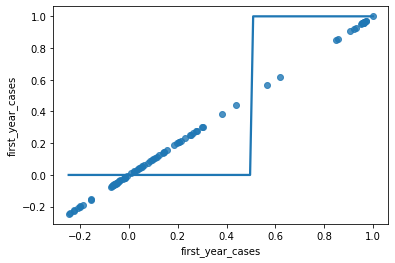

In [18]:
sns.regplot(x="first_year_cases", y="first_year_cases", data=df1_corr, logistic=True, ci=None)

    SOCIAL_CONTEXT DATA & CASE CORRELATION

In [42]:
social_context = pd.read_csv("data_sources/Social_Context.csv")
social_context.head(2)

,IBRC_Geo_ID,Statefips,Countyfips,Description,Year,Social_Context_Code,Social_Context_Code_Description,Social_Context_Domain_Data,Time_Period
0,10001,10,1,"Kent County, DE",2019,211,Hopefulness,87.332678,1972-2017
1,10001,10,1,"Kent County, DE",2019,104,Employment Rate,95.300000,2017


In [43]:
social_context = social_context.rename(columns={"IBRC_Geo_ID":"FIPS"})

In [44]:
df2= pd.merge(social_context, reduced_time_series, on="FIPS", how="outer")
df2

,FIPS,Statefips,Countyfips,Description,Year,Social_Context_Code,Social_Context_Code_Description,Social_Context_Domain_Data,Time_Period,UID,code3,Admin2,Province_State,3/31/21
0,10001.0,10.0,1.0,"Kent County, DE",2019.0,211.0,Hopefulness,87.332678,1972-2017,84010001.0,840.0,Kent,Delaware,15527.0
1,10001.0,10.0,1.0,"Kent County, DE",2019.0,104.0,Employment Rate,95.300000,2017,84010001.0,840.0,Kent,Delaware,15527.0
2,10001.0,10.0,1.0,"Kent County, DE",2019.0,103.0,Income Per Capita,26118.000000,2017,84010001.0,840.0,Kent,Delaware,15527.0
3,10001.0,10.0,1.0,"Kent County, DE",2019.0,102.0,Income Mobility,-0.441463,2017,84010001.0,840.0,Kent,Delaware,15527.0
4,10001.0,10.0,1.0,"Kent County, DE",2019.0,101.0,Entrepreneurship,10.732984,2013,84010001.0,840.0,Kent,Delaware,15527.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62020,51830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84051830.0,840.0,Williamsburg,Virginia,684.0
62021,51840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84051840.0,840.0,Winchester,Virginia,2657.0
62022,51195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84051195.0,840.0,Wise,Virginia,2984.0
62023,51199.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84051199.0,840.0,York,Virginia,3439.0


In [45]:
#set index to FIPS
df2 = df2.set_index(df2['FIPS'])
df2= df2.drop('FIPS', axis=1)

In [46]:
df2 = df2.rename(columns={"3/31/21":"first_year_cases"})

In [47]:
df2 = pd.get_dummies(df2, columns = ['Social_Context_Code_Description'])
df1

,State,ST_ABBR,County,LOCATION,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,...,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,UID,code3,Admin2,Province_State,first_year_cases,case_class_low,case_class_high
FIPS,,,,,,,,,,,,,,,,,,,,,
1001.0,ALABAMA,AL,Autauga,"Autauga County, Alabama",594.443459,55200.0,23315.0,21115.0,8422.0,1065.0,...,7.1,0.9,37301.0,84001001.0,840.0,Autauga,Alabama,6589.0,1,0
1009.0,ALABAMA,AL,Blount,"Blount County, Alabama",644.830460,57645.0,24222.0,20600.0,8220.0,909.0,...,11.0,1.3,40036.0,84001009.0,840.0,Blount,Alabama,6444.0,1,0
1013.0,ALABAMA,AL,Butler,"Butler County, Alabama",776.838201,20025.0,10026.0,6708.0,4640.0,567.0,...,10.2,1.7,17280.0,84001013.0,840.0,Butler,Alabama,2097.0,1,0
1015.0,ALABAMA,AL,Calhoun,"Calhoun County, Alabama",605.867251,115098.0,53682.0,45033.0,20819.0,4628.0,...,9.4,0.7,117894.0,84001015.0,840.0,Calhoun,Alabama,14224.0,0,1
1017.0,ALABAMA,AL,Chambers,"Chambers County, Alabama",596.560643,33826.0,16981.0,13516.0,5531.0,773.0,...,10.8,1.4,27176.0,84001017.0,840.0,Chambers,Alabama,3488.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48131.0,TEXAS,TX,Duval,"Duval County, Texas",1793.476183,11355.0,5592.0,3511.0,2751.0,482.0,...,24.5,3.7,9592.0,84048131.0,840.0,Duval,Texas,1214.0,1,0
48505.0,TEXAS,TX,Zapata,"Zapata County, Texas",998.411980,14369.0,6388.0,4405.0,5609.0,621.0,...,29.3,3.4,10924.0,84048505.0,840.0,Zapata,Texas,1760.0,0,1
48507.0,TEXAS,TX,Zavala,"Zavala County, Texas",1297.406535,12131.0,4344.0,3509.0,4150.0,421.0,...,18.4,3.0,10672.0,84048507.0,840.0,Zavala,Texas,1844.0,0,1


In [48]:
corrMatrix2 = df2.corr()
print(corrMatrix2)

                                                    Statefips  Countyfips  \
Statefips                                            1.000000    0.156951   
Countyfips                                           0.156951    1.000000   
Year                                                      NaN         NaN   
Social_Context_Code                                  0.000739    0.000714   
Social_Context_Domain_Data                           0.003520   -0.002812   
UID                                                  0.999981    0.126371   
code3                                                     NaN         NaN   
first_year_cases                                    -0.057284   -0.034469   
Social_Context_Code_Description_Agreeableness        0.000084    0.000081   
Social_Context_Code_Description_Belief In Science    0.000084    0.000081   
Social_Context_Code_Description_Collectivism         0.000084    0.000081   
Social_Context_Code_Description_Conflict Awareness   0.000084    0.000081   

In [49]:
corrMatrix2.to_csv("Social_Context_Case_Correlation.csv")

CENSUS DATA AND CASE RATE

In [31]:
census = pd.read_csv("data_sources/co-est2021-alldata.csv", encoding="ISO-8859-1")

In [32]:
census

,FIPS,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2020,POPESTIMATE2020,...,RESIDUAL2021,GQESTIMATESBASE2020,GQESTIMATES2020,GQESTIMATES2021,RBIRTH2021,RDEATH2021,RNATURALCHG2021,RINTERNATIONALMIG2021,RDOMESTICMIG2021,RNETMIG2021
0,1001.0,40,3,6,1,0,Alabama,Alabama,5024279,5024803,...,242,114572,114572,114572,11.191613,12.890226,-1.698613,0.247201,4.398749,4.645950
1,1003.0,50,3,6,1,1,Alabama,Autauga County,58805,58877,...,8,442,442,442,11.002611,11.545112,-0.542502,0.084766,4.017903,4.102668
2,1005.0,50,3,6,1,3,Alabama,Baldwin County,231767,233140,...,-82,2177,2177,2177,9.567474,12.137145,-2.569671,0.266704,28.702422,28.969126
3,1007.0,50,3,6,1,5,Alabama,Barbour County,25223,25180,...,1,2789,2789,2789,10.928526,15.714742,-4.786216,0.039885,-3.908743,-3.868858
4,1009.0,50,3,6,1,7,Alabama,Bibb County,22293,22223,...,-1,2062,2062,2062,10.111857,12.617450,-2.505593,0.089485,13.825503,13.914989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,NaN,50,4,8,56,37,Wyoming,Sweetwater County,42272,42158,...,-4,720,720,720,11.483551,9.549730,1.933820,0.429738,-15.255694,-14.825956
3190,NaN,50,4,8,56,39,Wyoming,Teton County,23331,23347,...,1,215,215,215,9.377264,4.091897,5.285367,0.340991,4.049273,4.390265
3191,NaN,50,4,8,56,41,Wyoming,Uinta County,20450,20441,...,0,187,187,187,11.003993,8.082579,2.921414,0.146071,6.378420,6.524491
3192,NaN,50,4,8,56,43,Wyoming,Washakie County,7685,7658,...,-1,119,119,119,9.893901,14.971034,-5.077133,0.000000,11.325913,11.325913


In [33]:
df3= pd.merge(census, reduced_time_series, on="FIPS", how="outer")
df3

,FIPS,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2020,POPESTIMATE2020,...,RDEATH2021,RNATURALCHG2021,RINTERNATIONALMIG2021,RDOMESTICMIG2021,RNETMIG2021,UID,code3,Admin2,Province_State,3/31/21
0,1001.0,40.0,3.0,6.0,1.0,0.0,Alabama,Alabama,5024279.0,5024803.0,...,12.890226,-1.698613,0.247201,4.398749,4.645950,84001001.0,840.0,Autauga,Alabama,6589.0
1,1003.0,50.0,3.0,6.0,1.0,1.0,Alabama,Autauga County,58805.0,58877.0,...,11.545112,-0.542502,0.084766,4.017903,4.102668,84001003.0,840.0,Baldwin,Alabama,20505.0
2,1005.0,50.0,3.0,6.0,1.0,3.0,Alabama,Baldwin County,231767.0,233140.0,...,12.137145,-2.569671,0.266704,28.702422,28.969126,84001005.0,840.0,Barbour,Alabama,2227.0
3,1007.0,50.0,3.0,6.0,1.0,5.0,Alabama,Barbour County,25223.0,25180.0,...,15.714742,-4.786216,0.039885,-3.908743,-3.868858,84001007.0,840.0,Bibb,Alabama,2542.0
4,1009.0,50.0,3.0,6.0,1.0,7.0,Alabama,Bibb County,22293.0,22223.0,...,12.617450,-2.505593,0.089485,13.825503,13.914989,84001009.0,840.0,Blount,Alabama,6444.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3478,90040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,84090040.0,840.0,Unassigned,Oklahoma,1887.0
3479,90044.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,84090044.0,840.0,Unassigned,Rhode Island,12400.0
3480,80047.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,84080047.0,840.0,Out of TN,Tennessee,17855.0
3481,90047.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,84090047.0,840.0,Unassigned,Tennessee,16230.0


In [34]:
df3.dropna()

,FIPS,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2020,POPESTIMATE2020,...,RDEATH2021,RNATURALCHG2021,RINTERNATIONALMIG2021,RDOMESTICMIG2021,RNETMIG2021,UID,code3,Admin2,Province_State,3/31/21
0,1001.0,40.0,3.0,6.0,1.0,0.0,Alabama,Alabama,5024279.0,5024803.0,...,12.890226,-1.698613,0.247201,4.398749,4.645950,84001001.0,840.0,Autauga,Alabama,6589.0
1,1003.0,50.0,3.0,6.0,1.0,1.0,Alabama,Autauga County,58805.0,58877.0,...,11.545112,-0.542502,0.084766,4.017903,4.102668,84001003.0,840.0,Baldwin,Alabama,20505.0
2,1005.0,50.0,3.0,6.0,1.0,3.0,Alabama,Baldwin County,231767.0,233140.0,...,12.137145,-2.569671,0.266704,28.702422,28.969126,84001005.0,840.0,Barbour,Alabama,2227.0
3,1007.0,50.0,3.0,6.0,1.0,5.0,Alabama,Barbour County,25223.0,25180.0,...,15.714742,-4.786216,0.039885,-3.908743,-3.868858,84001007.0,840.0,Bibb,Alabama,2542.0
4,1009.0,50.0,3.0,6.0,1.0,7.0,Alabama,Bibb County,22293.0,22223.0,...,12.617450,-2.505593,0.089485,13.825503,13.914989,84001009.0,840.0,Blount,Alabama,6444.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037.0,50.0,2.0,3.0,55.0,79.0,Wisconsin,Milwaukee County,939489.0,938149.0,...,11.118803,2.131595,0.773762,-13.679075,-12.905314,84056037.0,840.0,Sweetwater,Wyoming,4022.0
3139,56039.0,50.0,2.0,3.0,55.0,81.0,Wisconsin,Monroe County,46274.0,46281.0,...,11.008500,0.389299,0.259532,-2.681835,-2.422302,84056039.0,840.0,Teton,Wyoming,3609.0
3140,56041.0,50.0,2.0,3.0,55.0,83.0,Wisconsin,Oconto County,38965.0,39043.0,...,12.168523,-3.010242,-0.025511,11.071570,11.046059,84056041.0,840.0,Uinta,Wyoming,2128.0
3141,56043.0,50.0,2.0,3.0,55.0,85.0,Wisconsin,Oneida County,37845.0,37839.0,...,15.164656,-8.042261,0.052564,19.212069,19.264632,84056043.0,840.0,Washakie,Wyoming,891.0


In [36]:
#set index to FIPS
df3 = df3.set_index(df3['FIPS'])
df3= df3.drop('FIPS', axis=1)

In [37]:
df3 = df3.rename(columns={"3/31/21":"first_year_cases"})

In [40]:
corrMatrix3 = df3.corr()
print(corrMatrix3)

                         SUMLEV    REGION  DIVISION     STATE    COUNTY  \
SUMLEV                 1.000000 -0.015008 -0.010860  0.005936  0.122242   
REGION                -0.015008  1.000000  0.942240 -0.035854  0.003261   
DIVISION              -0.010860  0.942240  1.000000 -0.042193  0.021587   
STATE                  0.005936 -0.035854 -0.042193  1.000000  0.116271   
COUNTY                 0.122242  0.003261  0.021587  0.116271  1.000000   
ESTIMATESBASE2020     -0.606563 -0.001390  0.003493 -0.038118 -0.085215   
POPESTIMATE2020       -0.606661 -0.001229  0.003635 -0.038078 -0.085206   
POPESTIMATE2021       -0.607836 -0.000666  0.004060 -0.037928 -0.085249   
NPOPCHG2020           -0.056083  0.091929  0.081430  0.023127  0.004888   
NPOPCHG2021           -0.076716  0.059583  0.044561  0.018813  0.002168   
BIRTHS2020            -0.604525  0.002054  0.008420 -0.034107 -0.082586   
BIRTHS2021            -0.599979  0.004053  0.010264 -0.035400 -0.081653   
DEATHS2020            -0.

In [39]:
corrMatrix3.to_csv("Census_Case_Correlation.csv")

ALL DATA

In [50]:
merged_all_data = pd.read_csv("modified_data/merged_cleaned.csv")

In [52]:
df4 = merged_all_data.rename(columns={"3/31/21":"first_year_cases"})

In [53]:
corrMatrix4 = df4.corr()
print(corrMatrix4)

                      FIPS  first_year_cases  AREA_SQMI  E_TOTPOP      E_HU  \
FIPS              1.000000         -0.053688  -0.083964 -0.052665 -0.051664   
first_year_cases -0.053688          1.000000   0.036093  0.974529  0.957869   
AREA_SQMI        -0.083964          0.036093   1.000000  0.027261  0.024023   
E_TOTPOP         -0.052665          0.974529   0.027261  1.000000  0.993629   
E_HU             -0.051664          0.957869   0.024023  0.993629  1.000000   
...                    ...               ...        ...       ...       ...   
Religiosity      -0.043037         -0.144988  -0.022045 -0.180651 -0.190333   
Risk Taking       0.008719         -0.018626   0.005318 -0.007131 -0.009444   
Selflessness     -0.001239          0.028922   0.014473  0.034519  0.032849   
Tolerance        -0.011113          0.102469   0.005034  0.117862  0.121338   
Work Ethic        0.043064         -0.019118   0.013134 -0.018004 -0.018511   

                      E_HH     E_POV   E_UNEMP     

In [55]:
corrMatrix4.to_csv("all_data_merged_correlation.csv")

In [ ]:
https://public.tableau.com/app/profile/celeste8810/viz/ALL_Feature_Importance_Story/Story1?publish=yes